In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rc('font', family = 'Malgun Gothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'barChartExam'
filename = './../data/주요발생국가주간동향(4월2째주).csv'

In [3]:
data = pd.read_csv(filename, index_col = '국가')
data.columns

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [4]:
chartdata = data['4월06일']
chartdata

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64

In [5]:
def MakeBarChart01(x, y, color, xlabel, ylabel, title) :
    plt.figure()
    plt.bar(x, y, color = color, alpha = 0.7)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    YTICKS_INTERVAL = 50000

    maxlim = (int(y.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
    # print(maxlim)

    values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)

    plt.yticks(values, ['%s' % format(val, ',') for val in values])

    ratio = 100 * y / y.sum()
    # print(ratio)

    plt.rc('font', size = 6)
    for idx in range(y.size) :
        value = format(y.iloc[idx], ',') + '건'
        ratioval = '%.1f%%' % (ratio.iloc[idx])

        plt.text(x = idx, y = y.iloc[idx] + 1, s = value, horizontalalignment = 'center')
        plt.text(x = idx, y = y.iloc[idx] / 2, s = ratioval, horizontalalignment = 'center')

    meanval = y.mean()
    #print(meanval)

    average = '평균 : %d건' % meanval
    plt.axhline(y = meanval, color = 'r', linewidth = 1, linestyle = 'dashed')
    plt.text(x = y.size - 1, y = meanval + 200, s = average, horizontalalignment = 'center')

    global cnt
    cnt = cnt + 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi = 400)
    print(savefile + '파일이 저장되었습니다.')

barChartExam_01.png파일이 저장되었습니다.


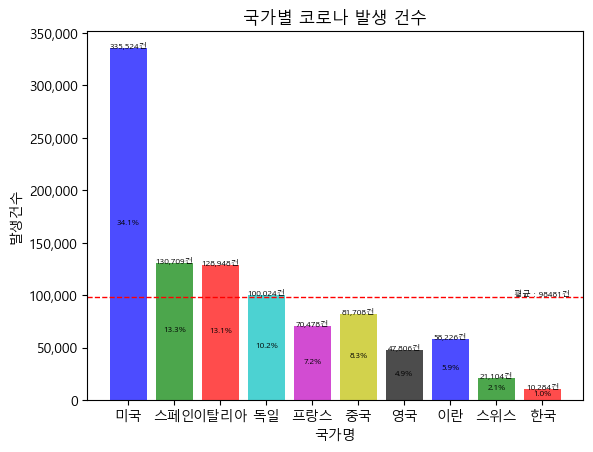

In [6]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

mycolor = colors[0 : len(chartdata)]

MakeBarChart01(x = chartdata.index, y = chartdata, color = mycolor , xlabel = '국가명', ylabel = '발생건수', title = '국가별 코로나 발생 건수')

In [7]:
def MakeBarChart02(chartdata, rotation, title, ylim = None, stacked = False, yticks_interval = 10000) :
    plt.figure()
    chartdata.plot(kind = 'bar', rot = rotation, title = title, legend = True, stacked = stacked)

    plt.legend(loc = 'best')

    if not stacked :
        maxlim = (int(max(chartdata.max()) / yticks_interval) + 1) * yticks_interval
        values = np.arange(0, maxlim + 1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values])
    else :
        maxlim = (int(max(chartdata.sum(axis = 1)) / yticks_interval) + 1) * yticks_interval
        values = np.arange(0, maxlim + 1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values])

    if ylim is not None:
        plt.ylim(ylim)

    global cnt
    cnt = cnt + 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi = 400)
    print(savefile + '파일이 저장되었습니다.')

In [8]:
data = pd.read_csv(filename, index_col = '국가')

COUNTRY = ['프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일']
data = data.loc[COUNTRY, WHEN]

data

,4월06일,4월07일,4월08일
국가,,,
프랑스,70478,74390,78167
중국,81708,81740,81802
영국,47806,51608,55242
이란,58226,60500,62589


barChartExam_02.png파일이 저장되었습니다.


<Figure size 640x480 with 0 Axes>

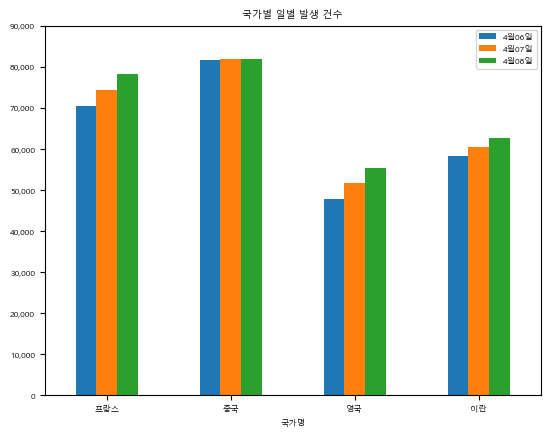

In [9]:
data.index.name = '국가명'
data.columns.name = '일자'

MakeBarChart02(chartdata = data, rotation = 0, title = '국가별 일별 발생 건수')

barChartExam_03.png파일이 저장되었습니다.


<Figure size 640x480 with 0 Axes>

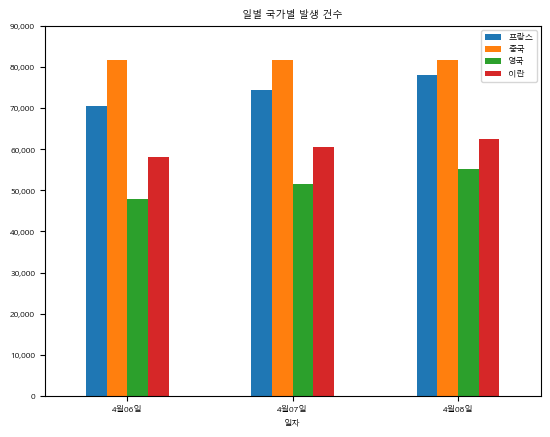

In [10]:
dataT = data.T

MakeBarChart02(chartdata = dataT, rotation = 0, title = '일별 국가별 발생 건수')

barChartExam_04.png파일이 저장되었습니다.


<Figure size 640x480 with 0 Axes>

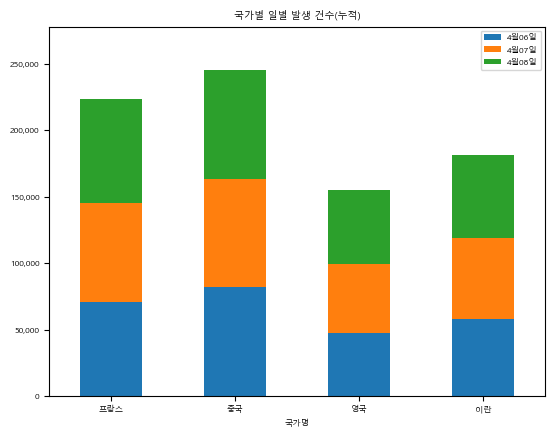

In [11]:
ymax = dataT.sum(axis = 1)
ymaxlimit = ymax.max() + 10

MakeBarChart02(chartdata = data, rotation = 0, title = '국가별 일별 발생 건수(누적)', ylim = [0, ymaxlimit], stacked = True, yticks_interval = 50000)

In [12]:
data = pd.read_csv(filename, index_col = '국가')
three = [item for item in data.index if item in ['프랑스', '영국', '중국']]
data = data.loc[three]

data

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991


In [13]:
column_names = data.columns.tolist()
column_names

['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일']

In [14]:
chartdata = {}

for row in data.index :
    chartdata[row] = data.loc[row].values

chartdata

{'프랑스': array([70478, 74390, 78167, 82048, 86334, 90276, 93790]),
 '중국': array([81708, 81740, 81802, 81865, 81907, 81953, 82052]),
 '영국': array([47806, 51608, 55242, 60733, 65077, 73758, 78991])}

In [15]:
def MakeBarChart03(chartdata, column_names) :
    labels = list(chartdata.keys())
    data = np.array(list(chartdata.values()))
    data_cum = data.cumsum(axis = 1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))
    fig, ax = plt.subplots(figsize = (9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis = 1).max())

    for i, (colname, color) in enumerate(zip(column_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left = starts, height = 0.5, label = colname, color= color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)) :
            ax.text(x, y, str(int(c)), ha = 'center', va = 'center', color = text_color)

    ax.legend(ncol = len(column_names), bbox_to_anchor = (0, 1), loc = 'lower left', fontsize = 'small')

    global cnt
    cnt = cnt + 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi = 400)
    print(savefile + '파일이 저장되었습니다.')

    return fig, ax


barChartExam_05.png파일이 저장되었습니다.


(<Figure size 920x500 with 1 Axes>, <Axes: >)

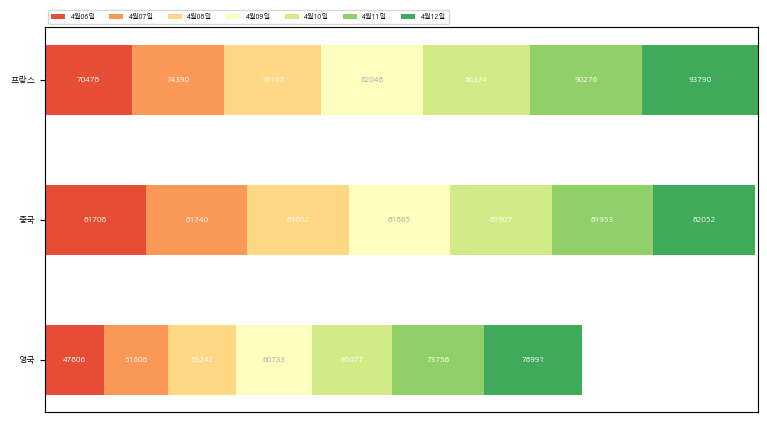

In [16]:
MakeBarChart03(chartdata, column_names)

In [17]:
def MakeBarChart04(chartdata, suptitle) :
    fig, axes = plt.subplots(nrows = 2, ncols = 1)

    chartdata.plot(kind = 'bar', ax = axes[0], rot = 0, alpha = 0.7)
    chartdata.plot(kind = 'barh', ax = axes[1], color = 'm', alpha = 0.7)

    fig.suptitle(suptitle)

    global cnt
    cnt = cnt + 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi = 400)
    print(savefile + '파일이 저장되었습니다.')

barChartExam_06.png파일이 저장되었습니다.


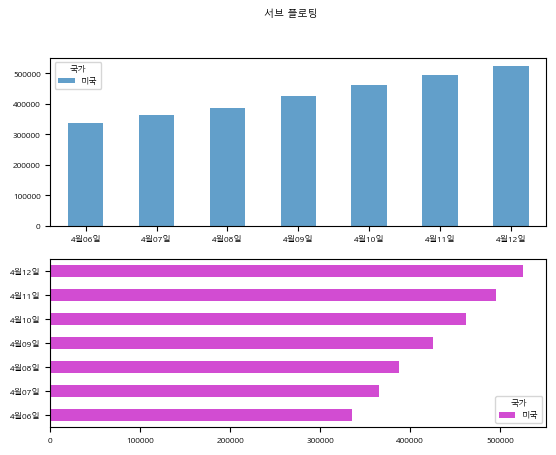

In [18]:
data = pd.read_csv(filename, index_col = '국가')
only_usa = [item for item in data.index if item in ['미국']]
data = data.loc[only_usa].T

MakeBarChart04(chartdata = data, suptitle = '서브 플로팅')

In [19]:
data = pd.read_csv(filename, index_col = '국가')
data.columns

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [20]:
COUNTRY = ['스페인', '프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']
data = data.loc[COUNTRY, WHEN]

data

,4월06일,4월07일,4월08일,4월09일,4월10일
국가,,,,,
스페인,130709,135032,140510,146690,152446
프랑스,70478,74390,78167,82048,86334
중국,81708,81740,81802,81865,81907
영국,47806,51608,55242,60733,65077
이란,58226,60500,62589,64586,66220


In [21]:
rows = [x for x in data.index]
rows

['스페인', '프랑스', '중국', '영국', '이란']

In [22]:
columns = [x for x in data.columns]
columns

['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']

In [23]:
n_rows = len(data)
# n_rows

LEFT_MARGIN = 0.3
index = np.arange(len(columns)) + LEFT_MARGIN
# index

y_offset = np.zeros(len(columns))
# y_offset

bar_width = 1 - 2 * LEFT_MARGIN

barChartExam_07.png파일이 저장되었습니다.


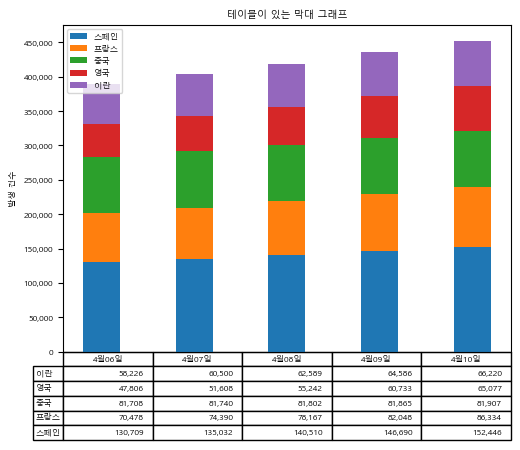

In [24]:
cell_text = []
plt.figure()

for row in data.index :
    chartdata = data.loc[row].tolist()

    plt.bar(index, chartdata, bar_width, bottom = y_offset, label = row)

    y_offset = y_offset + chartdata

    cell_text.append([format(x, ',') for x in chartdata])

cell_text.reverse()
rows = [rows[idx] for idx in range(len(rows) -1, -1, -1)]

the_table = plt.table(cellText = cell_text, rowLabels = rows, colLabels = columns, loc = 'bottom')

plt.legend(loc = 'best')
plt.subplots_adjust(left = 0.2, bottom = 0.2)

plt.ylabel('발생 건수')

YTICKS_INTERVAL = 50000
maxlim = (int(y_offset.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL

values = np.arange(0, maxlim, YTICKS_INTERVAL)

plt.yticks(values, ['%s' % format(val, ',') for val in values])
plt.xticks([])
plt.title('테이블이 있는 막대 그래프')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')
